In [58]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.util.systems import system_from_str
import scipy

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}
matplotlib.rc('font', **font)


resdir = '/Users/sbittner/Documents/dsn/dsn/results/RNN/';
D = 5;
T = 10;
nlayers = 10;
sigma_init = 1.0;
lr_order = -3;
c_init_order = -5;

k_max = 20;
num_rs = 1;

fontsize = 18;

figsize = (8,8);
x_val = [3.5, 1.0, 1.0, 1.0, 0.8];
labels = [r'$\mu_m$', r'$\mu_n$', r'$\sigma_m$', r'$\sigma_n$', r'$g$'];

rs = 1;
AL_final_it = 6;
k = AL_final_it + 1; #AL_final_its[rs-1] + 1;

savedir = resdir + 'R1RNN_GNG_D=%d_flow=M_%dP_sigma=%.2f_lr_order=%d_c=%d_rs=%d/' % \
                   (D, nlayers, sigma_init, lr_order, c_init_order, rs);
npzfile = np.load(savedir + 'results.npz');
title ='k=%d, sigma=%.2f rs=%d' % (k, sigma_init, rs)
phis = npzfile['phis'][k];
print(phis.shape);
Mms = phis[:,0];
Mns = phis[:,1];
Sims = phis[:,2];
Sins = phis[:,3];
gs = phis[:,4];

structs = Mms*Mns;
dsn_struct_to_rand_ratios = structs / gs;


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'matplotlib' is not defined

In [59]:
bptt_dir = '/Users/sbittner/Documents/dsn/dsn/results/RNN/bptt/';
num_rs = 1500;
nsamps = 1000;
bptt_mdotns = np.zeros((nsamps,));
bptt_mdotIBs = np.zeros((nsamps,));
bptt_ndotIBs = np.zeros((nsamps,));
bptt_gs = np.zeros((nsamps,));
bptt_struct_to_rand_ratios = np.zeros((nsamps,));
ind = 0;
for rs in range(num_rs):
    # load file
    fname = bptt_dir + 'r1rnn_gng_bptt_rs=%d.npz' % rs;
    npzfile = np.load(fname);
    
    # get training tolerance if first rs
    if (rs==0):
        tol = npzfile['tol'];
        
    # get structure and chaos parameters
    m = npzfile['m'];
    n = npzfile['n'];
    I_B = npzfile['I_B'];
    mdotn = np.dot(m[:,0], n[:,0]);
    mdotIB = np.dot(m[:,0], I_B[:,0]);
    ndotIB = np.dot(n[:,0], I_B[:,0]);
    
    N = npzfile['N'];
    struct = mdotn / N;
    g = npzfile['g'];
    cost = npzfile['cost'];
    
    if (cost > tol):
        print('rs %d failed' % rs);
    else:
        bptt_mdotns[ind] = mdotn;
        bptt_mdotIBs[ind] = mdotIB;
        bptt_ndotIBs[ind] = ndotIB;
        
        bptt_gs[ind] = g;
        bptt_struct_to_rand_ratios[ind] = struct / g;
        ind += 1;
    if (ind == nsamps):
        break;
        

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


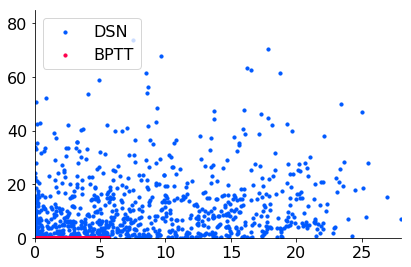

In [90]:
import matplotlib
savedir = '/Users/sbittner/Documents/dsn/written/images/CosyneAbstract/';

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

blue = [0.0, .35, 1.0];
red  = [1.0, 0.0, 0.3];
size = 10.0;
plt.figure();
plt.scatter(gs, structs, s=size, c=blue);
plt.scatter(bptt_gs, bptt_structs, s=size,  c=red);
plt.xlim([0, 28]);
plt.ylim([0, 85]);
ax = plt.gca();
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout();
plt.legend(['DSN', 'BPTT'], loc=2);
plt.savefig(savedir + 'Fig3_main.png');
plt.show();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


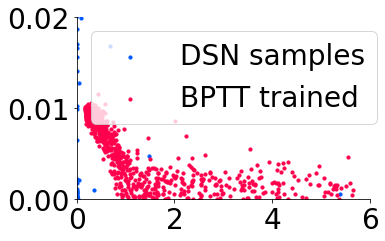

In [86]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}
matplotlib.rc('font', **font)

plt.figure();
plt.scatter(gs, structs, s=size, c=blue);
plt.scatter(bptt_gs, bptt_structs, s=size,  c=red);
plt.xlim([0, 6]);
plt.ylim([0, 0.02]);
ax = plt.gca();
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout();
plt.savefig(savedir +'Fig3_zoom.png');
plt.show();